# 🧠 MemBrain-seg Tutorial

Welcome to the **MemBrain-seg Tutorial**! This guide will walk you through the essential functionalities of MemBrain-seg, our tool for tomogram segmentation.

---

### 🌟 About MemBrain-seg

MemBrain-seg is designed to streamline the process of going from tomograms to segmentations with additional features for preprocessing and postprocessing. Whether you're new or experienced, this tutorial will help you get started.

📚 **For more detailed documentation, visit our [GitHub Repository](https://github.com/teamtomo/membrain-seg).**

---

### 📖 What You'll Learn
In this tutorial, you'll discover:
1. How to process tomograms and generate segmentations.
2. Useful preprocessing and postprocessing techniques.
3. Tips and tricks for optimizing your workflows.

---

Let's dive in! 🚀

### ⚡ Enable GPU for Better Performance

To take full advantage of this tutorial, please enable the GPU runtime in Google Colab:

1. Click on **Runtime** in the top menu.
2. Select **Change runtime type**.
3. In the popup:
   - Set **Hardware accelerator** to **GPU**.
   - Click **Save**.
4. Verify that the runtime is connected by checking the top-right corner.

With GPU enabled, the computations will run significantly faster! 🚀

### 🛠️ Preparations

Before we begin, let's set up the necessary resources and tools. What happens in the next cell is:

1. **Clone the Tutorial Repository**  
   Gain access to helper functions like downloading example data by cloning our GitHub repository.

2. **Install MemBrain-seg**  
   Use `pip` to install MemBrain-seg for tomogram segmentation.

---

The following cells execute these steps **automatically**, while suppressing logs for a clean output.

---

In [1]:
%%capture
from scipy.ndimage import map_coordinates # This import is for a bug happening on Colab
!rm -r membrain_tutorial_scripts
!git clone https://github.com/CellArchLab/membrain_tutorial_scripts.git
!pip install membrain-seg==0.0.7
!pip install gdown # this is necessary for downloading our pretrained model

### 🗂️ Step 1: Download Data

The following step will download the **MemBrain tutorial data** from [Zenodo](https://zenodo.org/records/14610597), as well as our pretrained model [from here](https://drive.google.com/file/d/1tSQIz_UCsQZNfyHg0RxD-4meFgolszo8/view?usp=sharing). This data is essential for completing the tutorial.

---

#### 📥 What This Step Does:
1. Imports the required helper functions.
2. Downloads the tutorial dataset from Zenodo.
3. Downloads the pretrained model.

Run the cell below to begin! 🚀


In [2]:
from membrain_tutorial_scripts.membrain_tutorial_scripts import (
    load_tutorial_data, download_membrain_model
)
load_tutorial_data()
download_membrain_model()

Unzipping downloaded data.

Done. Files in the tutorial folder:
positions
Tomo0001.mrc
membranes


Downloading...
From (original): https://drive.google.com/uc?id=1tSQIz_UCsQZNfyHg0RxD-4meFgolszo8
From (redirected): https://drive.google.com/uc?id=1tSQIz_UCsQZNfyHg0RxD-4meFgolszo8&confirm=t&uuid=7925df23-c3a9-4a2f-a859-0480c453edc0
To: /content/membrain_v10_alpha.ckpt
100%|██████████| 730M/730M [00:09<00:00, 77.9MB/s]

Checkpointt file is stored here: ./membrain_v10_alpha.ckpt


### 🖼️ Step 2: Visualize the Tomogram

Let’s take a moment to appreciate the tomogram's beauty! In this step, we’ll make a quick visualization of the example tomogram.

---

Run the cell below to generate the visualization. 🚀

In [7]:
from membrain_seg.segmentation.dataloading.data_utils import load_tomogram
from matplotlib import pyplot as plt


# tomo_file = "data5mbs/Tomo0001.mrc"
tomo_file = "data5mbs/Tomo0003.mrc"
tomo = load_tomogram(tomo_file).data

plt.figure(figsize=(5,5))
plt.imshow(tomo[:, :, 230] * -1, cmap="Greys")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data5mbs/Tomo0002.mrc'

### ✂️ Step 3: Crop the Tomogram

To speed up the tutorial, we’ll crop the tomogram to focus on a smaller region of interest. This reduces computational load and ensures faster processing in subsequent steps.

Run the cell below to crop the tomogram and prepare it for the next steps. 🚀


Cropped patch looks like this:


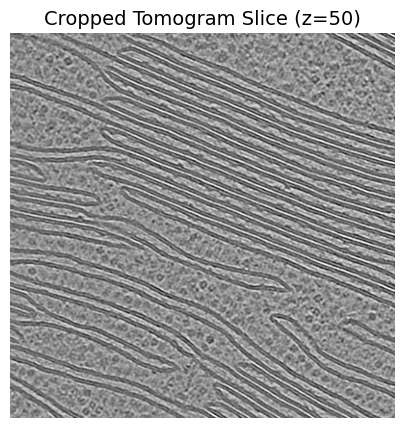

In [4]:
from membrain_tutorial_scripts.membrain_tutorial_scripts import crop_tomogram
import matplotlib.pyplot as plt

# Define file paths and cropping extents
out_path = "./data5mbs/Tomo0001_cropped.mrc"
extents = [
    (200, 600),  # x-range
    (200, 600),  # y-range
    (200, 300),  # z-range
]

# Perform cropping
cropped_tomo = crop_tomogram(tomo_file, out_path, extents)

# Display a slice of the cropped tomogram
print("Cropped patch looks like this:")
slice_idx = 50  # Adjust this index to view different slices
plt.figure(figsize=(5, 5))
plt.imshow(cropped_tomo[:, :, slice_idx] * -1, cmap="Greys")
plt.title(f"Cropped Tomogram Slice (z={slice_idx})", fontsize=14)
plt.axis("off")  # Remove axis for a cleaner view
plt.show()

### 🧪 Step 4: Perform Segmentation

Using the pretrained model (downloaded earlier), we’ll segment the cropped tomogram.  

📊 **What to Expect:**  
You’ll see a progress bar that runs 8 times (from 0 to 16). Each step represents one iteration of test-time augmentation, where flipped versions of the tomogram are processed and combined for a more robust segmentation.

Run the cell below to begin segmentation! 🚀


In [5]:
# Define paths
path_to_model = "./membrain_v10_alpha.ckpt"
cropped_path = "./data5mbs/Tomo0001_cropped.mrc"

# Run the segmentation command
!membrain segment --ckpt-path {path_to_model} --tomogram-path {cropped_path}

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2025-05-28 15:47:22.803065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748447243.124488    3350 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748447243.214934    3350 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:47:23.876577: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Segmenting tomogram ./data5mbs/Tomo0001_cropped.mrc

This can tak

### 🖼️ Step 5: Visualize the Output

With MemBrain-seg having completed the segmentation, it’s time to visualize the results and explore the segmented tomogram. Let’s see how the output looks! 🚀


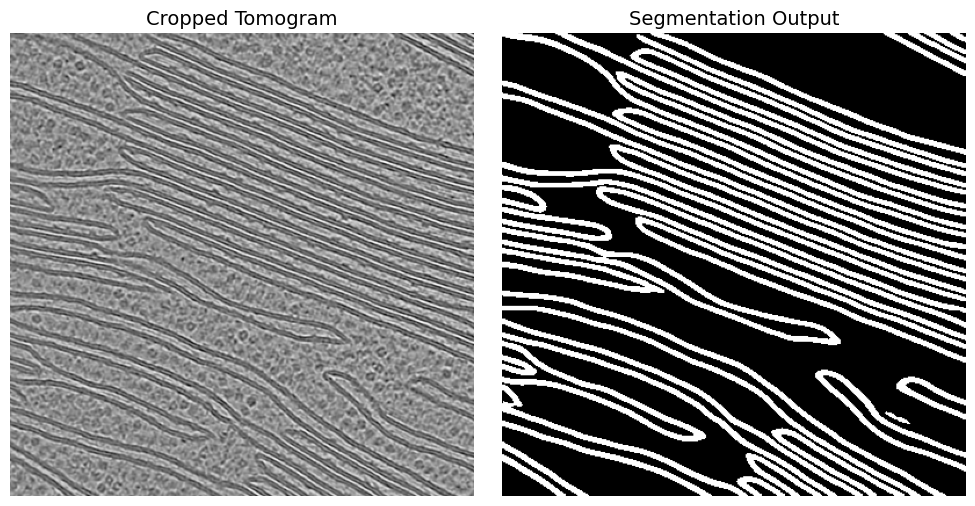

In [6]:
import matplotlib.pyplot as plt
from membrain_tutorial_scripts.membrain_tutorial_scripts import load_tomogram

# Define paths and load segmentation
path_to_segmentation = "./predictions/Tomo0001_cropped_membrain_v10_alpha.ckpt_segmented.mrc"
segmentation = load_tomogram(path_to_segmentation).data

# Visualization setup
slice_idx = 50  # Select the slice to visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original cropped tomogram
axes[0].imshow(cropped_tomo[:, :, slice_idx] * -1, cmap="Greys")
axes[0].set_title("Cropped Tomogram", fontsize=14)
axes[0].axis("off")

# Segmentation output
axes[1].imshow(1 - segmentation[:, :, slice_idx], cmap="Greys")
axes[1].set_title("Segmentation Output", fontsize=14)
axes[1].axis("off")

# Show the plots
plt.tight_layout()
plt.show()

### 🌟 What Else Can We Do?

MemBrain-seg offers a variety of options to customize and enhance the network output. Here are some additional steps you can explore:

1. **Rescale Inputs to a Standard Pixel Size**  
   Normalize your inputs to a standard resolution that is closer to our training pixel size. (Option 1)

2. **Output Scoremaps Before Thresholding**  
   Visualize raw confidence scores to better understand the network's predictions and adjust segmentation thresholds. (Option 2)

3. **Output Connected Components**  
   Identify and separate distinct regions within the segmentation for detailed analysis. (Option 2)

4. **Skeletonize the Output**  
   Reduce the segmented structure to its skeleton, enabling certain downstream analyses. (Option 3)



### 🔧 Option 1: Rescale Inputs

The default MemBrain-seg model is trained with a pixel size of approximately **10 Å**. While our data augmentation makes the model robust to size variations, significant deviations in pixel size may require rescaling your tomogram for optimal results.

#### How to Rescale:
1. Use the **`tomo_preprocessing` commands** (see our [documentation](#)).
2. Alternatively, use the `--rescale-patches` flag, which we’ll demonstrate here.

---

Using the `--rescale-patches` flag, the sliding window inference automatically rescales patches internally to the appropriate pixel size. This approach:
- Avoids the need to manually rescale the tomogram.
- Can be slightly faster for inference.

---

Run the cell below to see this in action! 🚀


In [7]:
# Define paths and parameters
path_to_model = "./membrain_v10_alpha.ckpt"
cropped_path = "./data5mbs/Tomo0001_cropped.mrc"
input_pixel_size = 14.08

# Run the segmentation command with rescaling
!membrain segment \
    --ckpt-path {path_to_model} \
    --tomogram-path {cropped_path} \
    --rescale-patches \
    --in-pixel-size {input_pixel_size}


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2025-05-28 15:48:24.711367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748447304.731033    3646 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748447304.737158    3646 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:48:24.757735: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Segmenting tomogram ./data5mbs/Tomo0001_cropped.mrc

This can tak

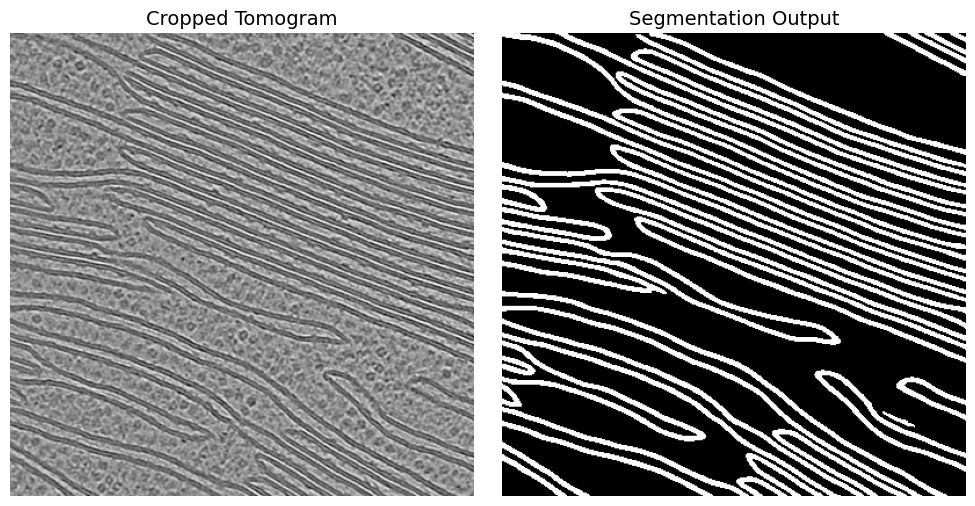

In [8]:
# Define the path to the segmented tomogram and load data
path_to_segmentation = "./predictions/Tomo0001_cropped_membrain_v10_alpha.ckpt_segmented.mrc"
segmentation = load_tomogram(path_to_segmentation).data

# Visualize the cropped tomogram and segmentation
slice_idx = 50  # Slice index to visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original cropped tomogram
axes[0].imshow(cropped_tomo[:, :, slice_idx] * -1, cmap="Greys")
axes[0].set_title("Cropped Tomogram", fontsize=14)
axes[0].axis("off")

# Segmentation output
axes[1].imshow(1 - segmentation[:, :, slice_idx], cmap="Greys")
axes[1].set_title("Segmentation Output", fontsize=14)
axes[1].axis("off")

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

In this case, the input pixel size is close enough to the training pixel size, so there isn’t a significant difference in the segmentation. However, the rescaling step becomes crucial when the input pixel size deviates more noticeably. I hope this illustrates the concept! :)

### 🔍 Option 2: Output Score Maps and Connected Components

These two outputs are grouped together because they are applied similarly using the following flags:
1. `--store-probabilities` for generating score maps.
2. `--store-connected-components` for computing connected components.

---

#### ⚙️ What These Outputs Do:
1. **Score Maps**:  
   - Provides an additional output alongside the segmentation.  
   - Allows you to adjust thresholds manually (default is `0.0`) using functionalities like `membrain thresholds` to refine the segmentation.  
   - This is useful for increasing or decreasing the segmented membranes based on confidence scores.

2. **Connected Components**:  
   - Useful for splitting membrane instances or filtering out small noise segmentations.  
   - Assigns a unique integer value to each connected component, making postprocessing simpler and more effective.

---

Run the cell below to enable these outputs and see them in action! 🚀


In [9]:
# Define paths to model and cropped tomogram
path_to_model = "./membrain_v10_alpha.ckpt"
cropped_path = "./data5mbs/Tomo0001_cropped.mrc"

# Run the segmentation command with additional output flags
!membrain segment \
    --ckpt-path {path_to_model} \
    --tomogram-path {cropped_path} \
    --store-probabilities \
    --store-connected-components


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2025-05-28 15:50:10.575668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748447410.596258    4110 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748447410.602398    4110 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-28 15:50:10.623021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Segmenting tomogram ./data5mbs/Tomo0001_cropped.mrc

This can tak

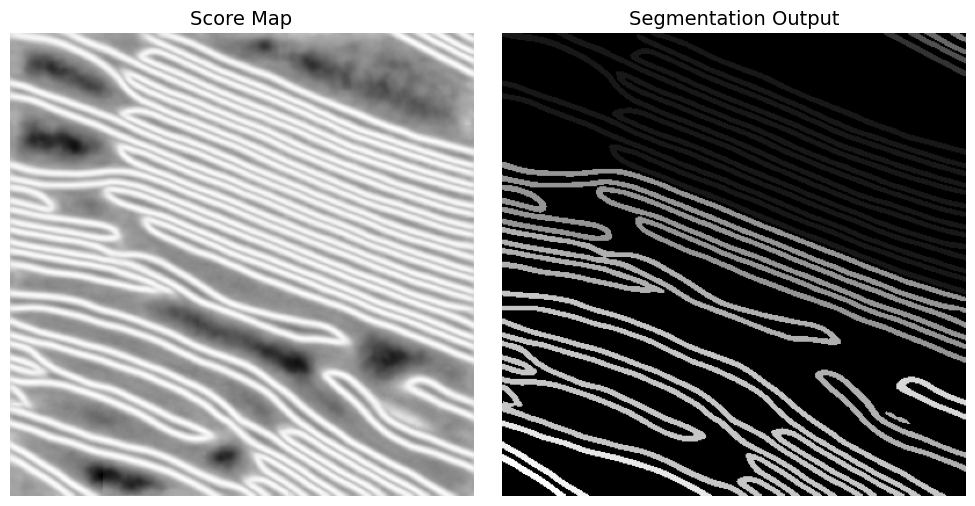

In [10]:
# Define file paths
path_to_segmentation = "./predictions/Tomo0001_cropped_membrain_v10_alpha.ckpt_segmented.mrc"
path_to_scores = "./predictions/Tomo0001_cropped_scores.mrc"

# Load segmentation and score maps
segmentation = load_tomogram(path_to_segmentation).data
scores = load_tomogram(path_to_scores).data

# Visualization setup
slice_idx = 50  # Slice index to visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display score map
axes[0].imshow(scores[:, :, slice_idx] * -1, cmap="Greys")
axes[0].set_title("Score Map", fontsize=14)
axes[0].axis("off")

# Display segmentation output
axes[1].imshow(1 - segmentation[:, :, slice_idx], cmap="Greys")
axes[1].set_title("Segmentation Output", fontsize=14)
axes[1].axis("off")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### Some example thresholds to be applied for the scoremap:

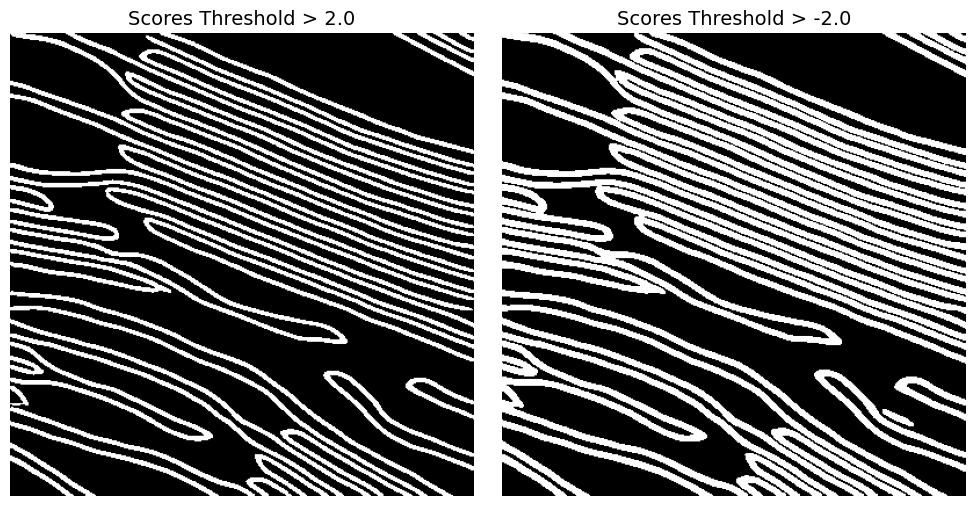

In [11]:
# Visualization setup
slice_idx = 50  # Slice index to visualize
threshold_1 = 2.0  # First threshold for comparison
threshold_2 = -2.0  # Second threshold for comparison

# Create figure and subplots
plt.figure(figsize=(10, 5))

# Subplot 1: Visualization with the first threshold
plt.subplot(1, 2, 1)
plt.imshow(1 - (scores[:, :, slice_idx] > threshold_1), cmap="Greys")
plt.title(f"Scores Threshold > {threshold_1}", fontsize=14)
plt.axis("off")  # Hide axes for cleaner visualization

# Subplot 2: Visualization with the second threshold
plt.subplot(1, 2, 2)
plt.imshow(1 - (scores[:, :, slice_idx] > threshold_2), cmap="Greys")
plt.title(f"Scores Threshold > {threshold_2}", fontsize=14)
plt.axis("off")  # Hide axes for cleaner visualization

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


### 🦴 Option 3: Skeletonization

Skeletonization is a postprocessing step that reduces segmented membranes to **1-voxel-thick sheets**. This can be applied to MemBrain-seg outputs or any other segmentation data.

---

#### Steps:
1. **Create a Binary Segmentation**:  
   We’ll threshold the previously generated score map to produce a binary segmentation.
2. **Apply Skeletonization**:  
   Use the binary segmentation to generate the skeletonized output.

---

Run the cell below to perform skeletonization on the segmented membranes! 🚀


In [12]:
# Define file paths and parameters
scoremap_path = "./predictions/Tomo0001_cropped_scores.mrc"
out_folder = "./predictions"
threshold = 0.0
binary_segmentation_path = f"{out_folder}/Tomo0001_cropped_scores_threshold_{threshold}.mrc"

# Step 1: Apply thresholds to generate a binary segmentation
!membrain thresholds \
    --scoremap-path {scoremap_path} \
    --thresholds {threshold} \
    --out-folder {out_folder}

# Step 2: Apply skeletonization on the binary segmentation
!membrain skeletonize \
    --label-path {binary_segmentation_path}


INFO:root:Thresholding at0.0
INFO:root:Saved thresholded scoremap to ./predictions/Tomo0001_cropped_scores_threshold_0.0.mrc
Skeletonizing the segmentation

This can take several minutes. If you are bored, why not learn about what's             happening under the hood by reading the MemBrain v2 preprint?
MemBrain v2: an end-to-end tool for the analysis of membranes in             cryo-electron tomography
https://www.biorxiv.org/content/10.1101/2024.01.05.574336v1

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
INFO:root:Computing Eigenvalues and Eigenvectors.
INFO:root:In case the execution of the program is terminated unexpectedly, attempt to rerun it using smaller segmentation patchesor give a specified batch size as

### 🦴 Visualizing the Skeletonization Output

Now that the skeletonization step is complete, let’s load and visualize the skeletonized tomogram. This will allow us to inspect the 1-voxel-thick skeleton structure created from the segmentation.

Run the cell below to see the results! 🚀


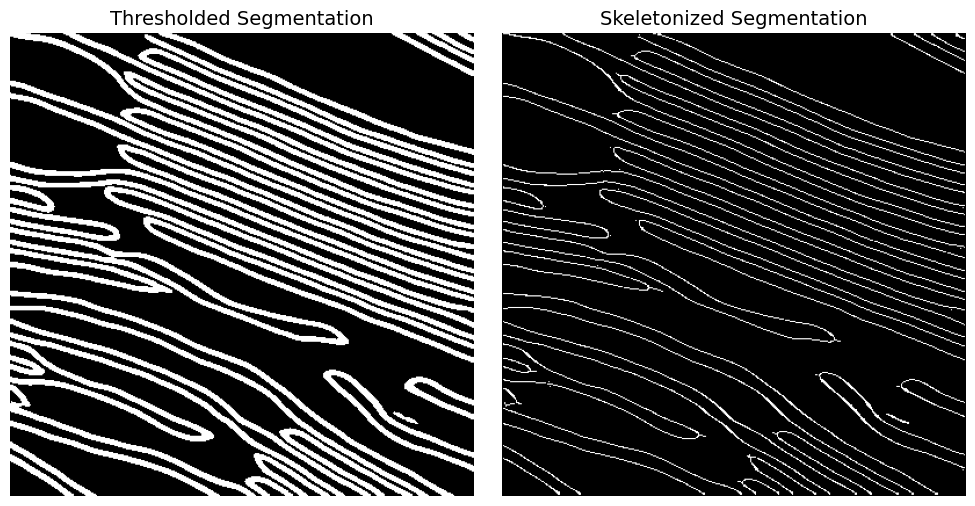

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
from membrain_tutorial_scripts.membrain_tutorial_scripts import load_tomogram

# Define file paths
thresholded_seg_file = "./predictions/Tomo0001_cropped_scores_threshold_0.0.mrc"
skel_file = "./predictions/Tomo0001_cropped_scores_threshold_0.0_skel.mrc"

# Load data
seg = load_tomogram(thresholded_seg_file).data
skel = load_tomogram(skel_file).data

# Visualization setup
slice_idx = 50  # Slice index to visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Subplot 1: Thresholded segmentation
axes[0].imshow(seg[:, :, slice_idx] * -1, cmap="Greys")
axes[0].set_title("Thresholded Segmentation", fontsize=14)
axes[0].axis("off")

# Subplot 2: Skeletonized segmentation
axes[1].imshow(skel[:, :, slice_idx] * -1, cmap="Greys")
axes[1].set_title("Skeletonized Segmentation", fontsize=14)
axes[1].axis("off")

# Show plots
plt.tight_layout()
plt.show()


# 🎉 End of Tutorial

Congratulations! 🎊 You’ve made it to the end of the MemBrain-seg tutorial.  

We hope you found it informative and helpful for exploring the functionalities of MemBrain-seg.  

---

### 🙋 Feedback & Discussion
If you encounter any issues, have questions about the tutorial or MemBrain functionality, or simply want to discuss potential new features, we’d love to hear from you!  

📩 **Get in touch**:
- [GitHub Issues](https://github.com/teamtomo/membrain-seg/issues): Report bugs or request features.

---

Thank you for trying out MemBrain-seg. Happy segmenting! 🚀
